In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tags.csv to tags.csv
Saving ratings.csv to ratings.csv
Saving movies.csv to movies.csv
Saving links.csv to links.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_ratings = pd.read_csv('ratings.csv')
df_links = pd.read_csv('links.csv')

In [ ]:
df_movies.shape

(9742, 3)

In [ ]:
df_ratings.shape

(100836, 4)

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
df_ratings['userId'].nunique()

610

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_ratings.groupby(by='movieId')['movieId'].count().sort_values(ascending=False)

,movieId
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


In [ ]:
df_movies[df_movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movies[df_movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
df_tags[df_tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [ ]:
df_movies[df_movies['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_ratings[df_ratings['movieId']==589]['rating'].mean()

3.970982142857143

In [ ]:
df_movies[df_movies['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [ ]:
fight_movie = df_ratings[df_ratings['movieId']==2959]['rating']

<ipython-input-41-88b02aea4a5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fight_movie)


<Axes: xlabel='rating', ylabel='Density'>

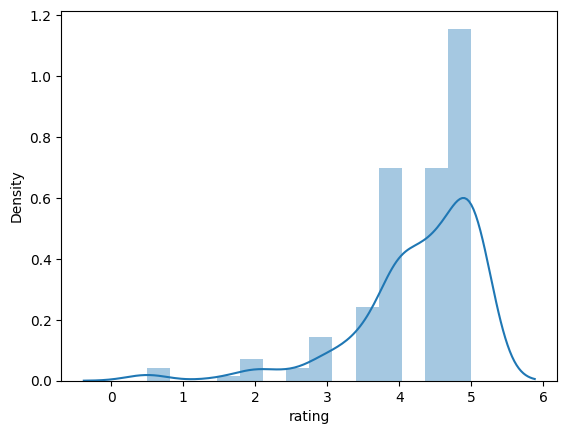

In [ ]:
sns.distplot(fight_movie)

In [ ]:
high_rate = df_ratings.groupby(by='movieId')['rating'].count()
high_rate

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [ ]:
high = pd.DataFrame(high_rate)
high

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [ ]:
note1 = pd.merge(df_movies,high, on='movieId', how='inner')

In [ ]:
sci = note1.sort_values(by='rating', ascending=False)
fifty = sci[sci['rating']>50]

In [84]:
fifty

,movieId,title,genres,rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
...,...,...,...,...
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51
1562,2100,Splash (1984),Comedy|Fantasy|Romance,51
3490,4776,Training Day (2001),Crime|Drama|Thriller,51
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51


In [85]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
note1[note1['title']=='Godfather, The (1972)']

,movieId,title,genres,rating
659,858,"Godfather, The (1972)",Crime|Drama,4.289062


In [ ]:
note1[note1['title']=='Shawshank Redemption, The (1994)']

,movieId,title,genres,rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022


In [ ]:
note1[note1['title']=='Jumanji (1995)']

,movieId,title,genres,rating
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818


In [ ]:
note1[note1['title']=='Wolf of Wall Street, The (2013)']

,movieId,title,genres,rating
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,3.916667


In [88]:
note1[note1['title']=='Matrix, The (1999)']

,movieId,title,genres,rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
